In [75]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calplot
import matplotlib.colors

import warnings
warnings.filterwarnings('ignore')

if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

year = input("Enter year: ") or "2023"

path = input("Enter path: ")

if path[-1] != "/":
    path = path+"/"

# path = f"/import/freenas-ffb-01-data/romy_autodata/{year}/RU/"


days_of_year = pd.date_range(f"{year}-01-01",  f"{year}-12-31", freq='D')

file_exists = pd.Series(-1*np.ones(len(days_of_year)), index=days_of_year)

Enter year:  2023
Enter path:  /import/freenas-ffb-01-data/romy_autodata/2023/RU


In [78]:
for doy in days_of_year:

    doy = str(doy).split(" ")[0]
    _doy = doy.replace("-", "")

    # if os.path.isfile(path+f"FJU_{_doy}.pkl"):
    if len(glob.glob(path+f'*{_doy}*')) == 1:
        file_exists.loc[doy] = 1

2023-01-01    1.0
2023-01-02    1.0
2023-01-03    1.0
2023-01-04    1.0
2023-01-05    1.0
             ... 
2023-12-27    1.0
2023-12-28    1.0
2023-12-29    1.0
2023-12-30    1.0
2023-12-31    1.0
Freq: D, Length: 365, dtype: float64


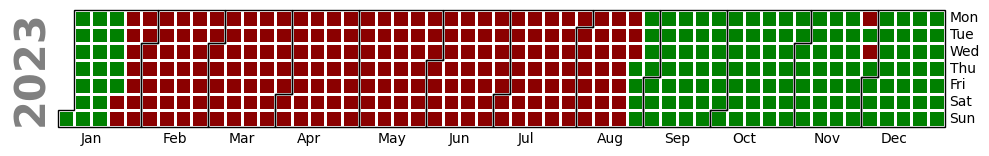

In [82]:
cmap = matplotlib.colors.ListedColormap(['darkred', 'green'])

calplot.calplot(file_exists, cmap=cmap, edgecolor="k", colorbar=False, yearlabel_kws={'fontname':'sans-serif'})

plt.show();